In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)
import numpy as np
import pandas as pd
from root_pandas import read_root

In [2]:
#digi_features = ['event', 'hgcdigi_id', 'hgcdigi_subdet', 'hgcdigi_zside', 'hgcdigi_layer', 'hgcdigi_wafer', 
#                 'hgcdigi_cell', 'hgcdigi_eta', 'hgcdigi_phi', 'hgcdigi_z', 'hgcdigi_data', 'hgcdigi_simenergy']

tc_features = ['event', 'tc_id', 'tc_subdet', 'tc_zside', 'tc_layer', 'tc_wafer', 'tc_cell', 'tc_energy',
               'tc_simenergy', 'tc_eta', 'tc_phi', 'tc_z',]

gen_features = ['event', 'gen_id', 'gen_status', 'gen_energy', 'gen_pt', 'gen_eta', 'gen_phi']

geom_features = ['id', 'zside', 'subdet','layer', 'module', 'x', 'y', 'z', 'tc_layer',
                 'tc_zside', 'tc_subdet', 'tc_id', 'tc_x', 'tc_y', 'tc_z']

#df_digi = read_root('../data/ntuple_singleGamma140_oldmap_932_full.root', 'hgcalTriggerNtuplizer/HGCalTriggerNtuple',
#                     columns=digi_features, flatten=digi_features)

df_tc = read_root('../data/ntuple_singleGamma140_newmap.root', 'hgcalTriggerNtuplizer/HGCalTriggerNtuple',
                   columns=tc_features, flatten=tc_features)

df_gen = read_root('../data/ntuple_singleGamma140_newmap.root', 'hgcalTriggerNtuplizer/HGCalTriggerNtuple',
                   columns=gen_features, flatten=gen_features)

df_geom = read_root('../data/test_triggergeom_newmap.root', 'hgcaltriggergeomtester/TreeModules', 
                    columns=geom_features, flatten=geom_features)

df_tc = pd.merge(df_tc, df_gen, on='event')
#df_digi = pd.merge(df_digi, df_gen, on='event')

In [3]:
this_tc = df_tc.query('tc_zside == 1 and tc_subdet == 3')

In [4]:
this_tc.head()

,event,tc_id,tc_subdet,tc_zside,tc_layer,tc_wafer,tc_cell,tc_energy,tc_simenergy,tc_eta,tc_phi,tc_z,__array_index_x,gen_id,gen_status,gen_energy,gen_pt,gen_eta,gen_phi,__array_index_y
3116,3502,1728849963,3,1,1,40,43,0.818152,0.0,2.474710,1.769193,320.755005,1558,22,1,94.163231,25.000462,2.001175,0.694839,0
3117,3502,1728849963,3,1,1,40,43,0.818152,0.0,2.474710,1.769193,320.755005,1558,22,1,94.163231,25.000462,-2.001175,-2.446754,1
3118,3502,1728844822,3,1,1,20,22,0.300258,0.0,2.717353,2.363337,320.755005,1559,22,1,94.163231,25.000462,2.001175,0.694839,0
3119,3502,1728844822,3,1,1,20,22,0.300258,0.0,2.717353,2.363337,320.755005,1559,22,1,94.163231,25.000462,-2.001175,-2.446754,1
3120,3502,1728923688,3,1,1,328,40,0.702000,0.0,1.566361,2.889600,320.755035,1560,22,1,94.163231,25.000462,2.001175,0.694839,0


In [5]:
z = df_tc.tc_z
eta = df_tc.tc_eta
phi = df_tc.tc_phi
theta = 2*np.arctan(np.exp(-eta))
x = z*np.tan(theta)*np.cos(phi)
y = z*np.tan(theta)*np.sin(phi)
df_tc['tc_x'] = x
df_tc['tc_y'] = y

In [6]:
#z = df_digi.hgcdigi_z
#eta = df_digi.hgcdigi_eta
#phi = df_digi.hgcdigi_phi
#theta = 2*np.arctan(np.exp(-eta))
#x = z*np.tan(theta)*np.cos(phi)
#y = z*np.tan(theta)*np.sin(phi)
#df_digi['hgcdigi_x'] = x
#df_digi['hgcdigi_y'] = y

In [7]:
zside = 1
subdet = 3
event = 3502

In [8]:
prefactor = 100
layerList = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27])
e_sim = 0.

for layer in layerList:

    #this_digi = df_digi.query('hgcdigi_zside == {0} and hgcdigi_subdet == {1} \
    #                           and hgcdigi_layer == {2} and event == {3} \
    #                          and hgcdigi_simenergy > 0'.format(zside, subdet, layer, event))
    
    this_tc = df_tc.query('tc_zside == {0} and tc_subdet == {1} \
                            and tc_layer == {2} and event == {3} \
                            and gen_eta > 0 and tc_energy > 0'.format(zside, subdet, layer, event))

    this_geom = df_geom.query('zside == {0} and subdet == {1} and layer == {2}'.format(zside, subdet, layer))

    plt.figure(figsize=(5,5))
    plt.grid()
    plt.xlim(-200,200)
    plt.ylim(-200,200)
    plt.xlabel('x [cm]')
    plt.ylabel('y [cm]')

    colors = [cm.get_cmap('Vega20')(i) for i in range(20)]
    colors.extend([cm.get_cmap('Set3')(i) for i in range(12)])
    colors.extend([cm.get_cmap('Dark2')(i) for i in range(8)])

    groupby = this_geom.groupby('id')
    for i, key in enumerate(list(groupby.groups.keys())):
        this_group = groupby.get_group(key)
        plt.scatter(this_group.tc_x, this_group.tc_y, s=0.4, edgecolors="None", color=colors[i%len(colors)]);

    tc_pu = this_tc[this_tc.tc_energy - this_tc.tc_simenergy > 0]
    tc_sim = this_tc[this_tc.tc_simenergy > 0]
    
    e_sim += this_tc.tc_simenergy.sum()
    
    tc_scatter = plt.scatter(tc_pu.tc_x, tc_pu.tc_y, s=np.log(prefactor*(tc_pu.tc_energy-tc_pu.tc_simenergy)), 
                             c='r', edgecolors='None', label='pu hits')

    sim_scatter = plt.scatter(tc_sim.tc_x, tc_sim.tc_y, s=np.log(prefactor*tc_sim.tc_simenergy), 
                              c='b', edgecolors='None', label='sim hits')
    lgnd = plt.legend(handles=[tc_scatter, sim_scatter], prop={'size': 6}, scatterpoints=1)
    lgnd.legendHandles[0].set_sizes([6.0])
    lgnd.legendHandles[1].set_sizes([6.0])
    plt.text(-190, 190, '$E_{{sim}} = {0:.2f} \; GeV$'.format(e_sim), fontsize=15, verticalalignment='top')
    
    plt.title('Layer {0}'.format(layer))
    plt.savefig('../plots/simhits_pu/layer_{0}_simhits_plus_pu.png'.format(layer//2+1), dpi=500)
    plt.close()

In [9]:
df_tc.query('tc_zside == 1 and tc_subdet == 3 and gen_eta > 0 and tc_layer % 2 != 0').tc_simenergy.sum()/df_tc.query('tc_zside == 1 and tc_subdet == 3 and gen_eta > 0 and tc_layer % 2 != 0').gen_energy.unique().sum()

0.95941473058164317

In [10]:
df_simreso = df_tc.query('tc_zside == 1 and tc_subdet == 3 and gen_eta > 0 and tc_layer % 2 != 0 and tc_simenergy > 0')
simarr = []
tcarr = []
genarr = []
groupby = df_simreso.groupby('event')
for evt in groupby.groups:
    this_evt = groupby.get_group(evt)
    tc_energy = 2*this_evt.tc_energy.sum()
    sim_energy = this_evt.tc_simenergy.sum()
    gen_energy = this_evt.gen_energy.values[0]
    simarr.append(sim_energy)
    genarr.append(gen_energy)
    tcarr.append(tc_energy)
simarr = np.array(simarr)
genarr = np.array(genarr)
tcarr = np.array(tcarr)

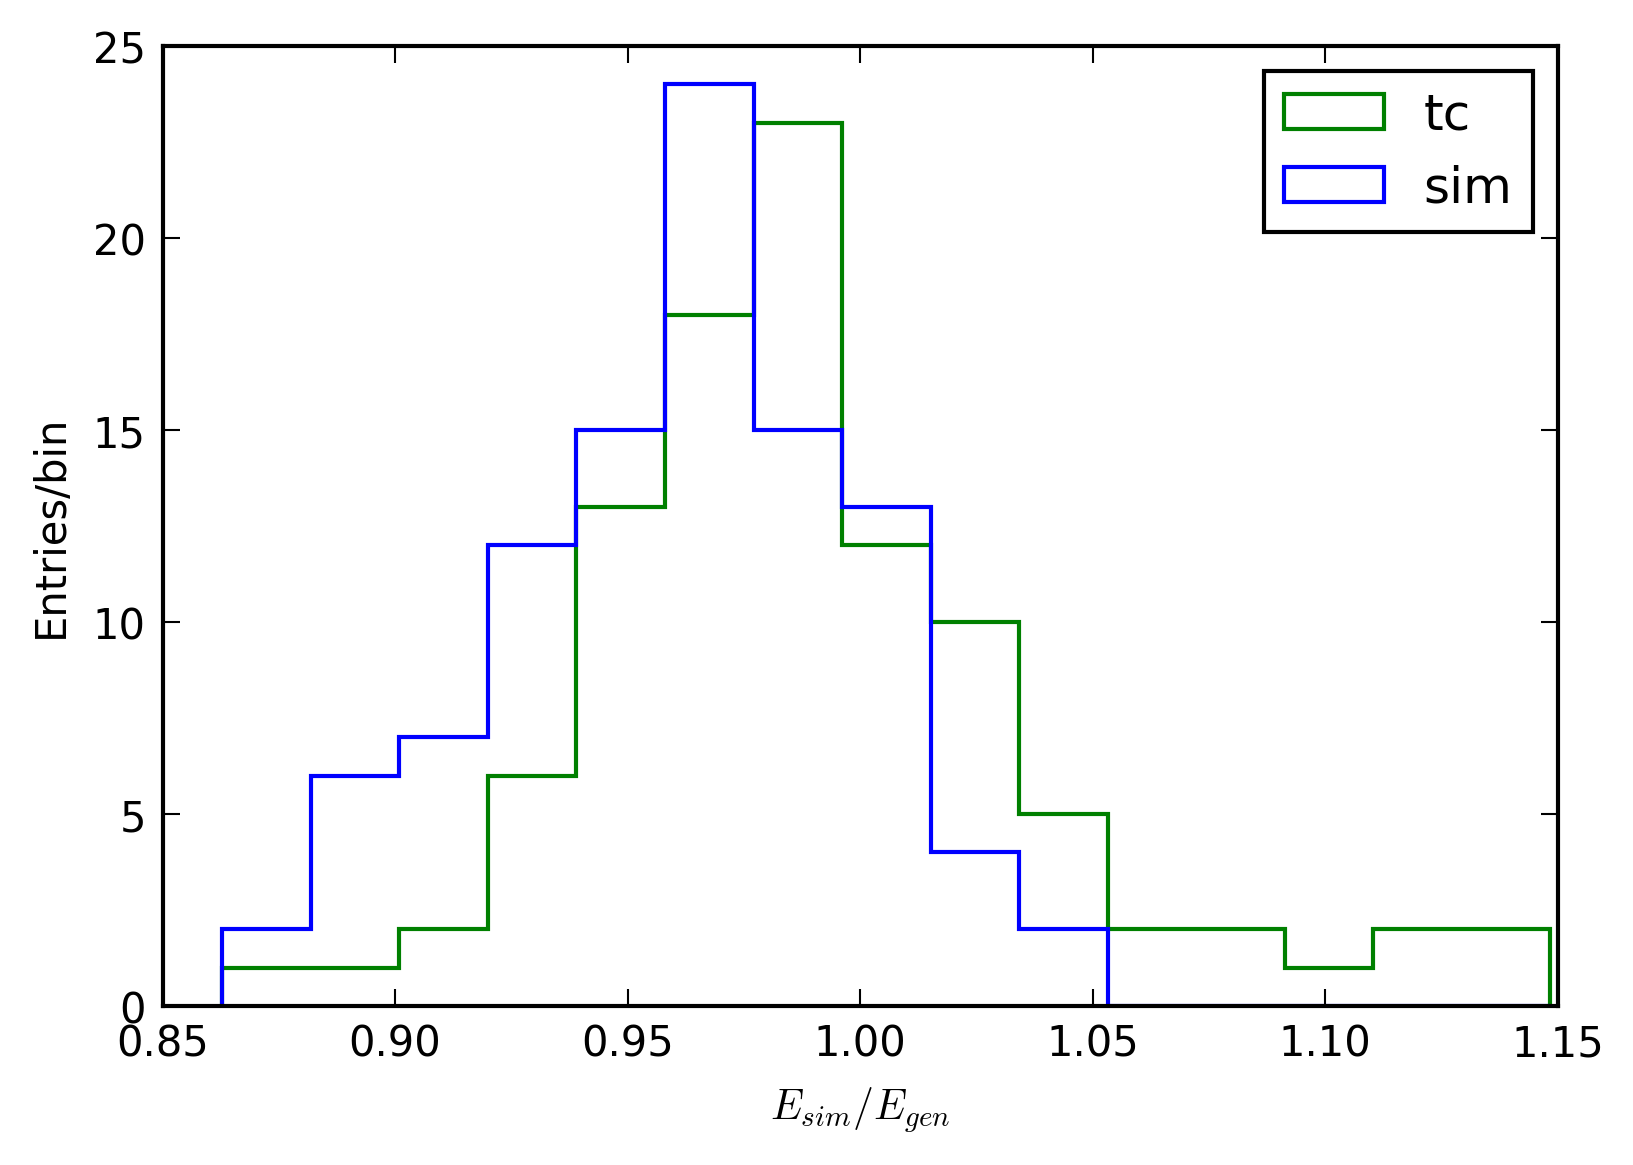

In [11]:
e_ratio = simarr/genarr
e_ratio2 = tcarr/genarr
fig, ax = plt.subplots()
ax.hist([e_ratio, e_ratio2], bins=15, histtype='step', label = ['sim', 'tc'])
ax.set_xlabel(r'$E_{sim}/E_{gen}$')
ax.set_ylabel('Entries/bin')
ax.legend()

In [13]:
print(np.std(e_ratio))

0.0374648


In [14]:
print(np.std(e_ratio2))

0.0492490217989
